<a href="https://colab.research.google.com/github/UMB200/pytorch_projects/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise

In [109]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [110]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [111]:
# Create the data parameters
weight, bias = 0.3, 0.9
start, end = 0, 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
#X = torch.arange(start, end, step) # removed unsqueeze to change the shape of the tensor from shape [N] to [N:1]
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [112]:
# Split the data into training and testing
training_split = int(0.8 * len(X))
X_training_data = X[:training_split]
y_training_data = y[:training_split]
X_testing_data = X[training_split:]
y_testing_data = y[training_split:]

In [113]:
# Plot the training and testing data
def plot_data (TrainingData = X_training_data,
               TrainingLabels = y_training_data,
               TestingData = X_testing_data,
               TestingLabels = y_testing_data,
               predictions = None):
  """
  Plots training data, testing data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(TrainingData, TrainingLabels, c="b", s=4, label="Training Data")
  plt.scatter(TestingData, TestingLabels, c="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(TestingData, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})
  plt.show()

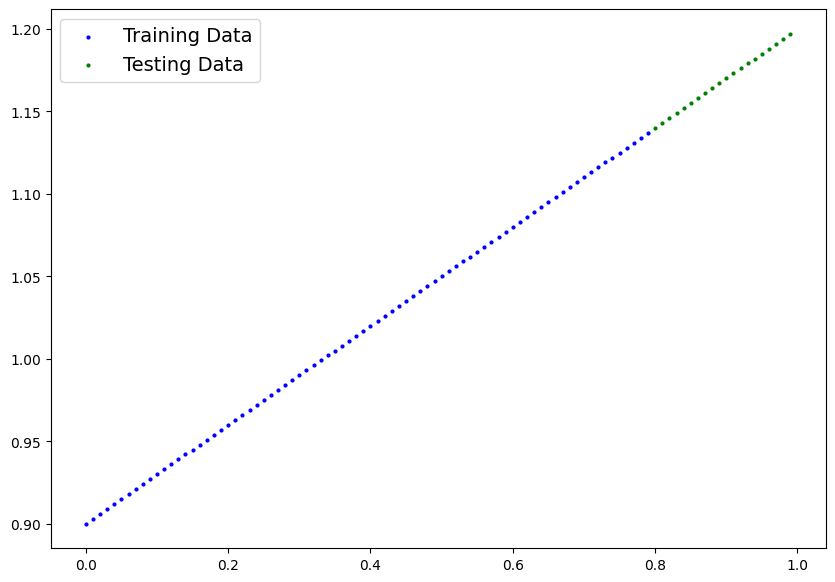

In [114]:
plot_data();

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [115]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    #self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [116]:
# Instantiate the model and put it to the target device
model_1_0 = LinearRegressionModel()
model_1_0.state_dict()
model_1_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [145]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()
optimizer_sgd = torch.optim.SGD(params=model_1_0.parameters(), lr=0.001)

In [146]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs_qty = 300

# Send data to target device
X_training_data = X_training_data.to(device)
y_training_data = y_training_data.to(device)
X_testing_data = X_testing_data.to(device)
y_testing_data = y_testing_data.to(device)

for epoch in range(epochs_qty):
  ### Training
  # Put model in train mode
  model_1_0.train()

  # 1. Forward pass
  y_predictions = model_1_0(X_training_data)

  # 2. Calculate loss
  loss_value = loss_function(y_predictions, y_training_data)

  # 3. Zero gradients
  optimizer_sgd.zero_grad()

  # 4. Backpropagation
  loss_value.backward()

  # 5. Step the optimizer
  optimizer_sgd.step()

  ### Testing
  # Put model in eval mode
  model_1_0.eval()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_1_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_predictions = model_1_0(X_testing_data)
      # 2. Calculate test loss
      test_loss = loss_function(test_predictions, y_testing_data)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss_value:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.005 | Test loss: 0.007
Epoch: 20 | Train loss: 0.000 | Test loss: 0.001
Epoch: 40 | Train loss: 0.000 | Test loss: 0.001
Epoch: 60 | Train loss: 0.000 | Test loss: 0.001
Epoch: 80 | Train loss: 0.000 | Test loss: 0.001
Epoch: 100 | Train loss: 0.000 | Test loss: 0.001
Epoch: 120 | Train loss: 0.000 | Test loss: 0.001
Epoch: 140 | Train loss: 0.000 | Test loss: 0.001
Epoch: 160 | Train loss: 0.000 | Test loss: 0.001
Epoch: 180 | Train loss: 0.000 | Test loss: 0.001
Epoch: 200 | Train loss: 0.000 | Test loss: 0.001
Epoch: 220 | Train loss: 0.000 | Test loss: 0.001
Epoch: 240 | Train loss: 0.000 | Test loss: 0.001
Epoch: 260 | Train loss: 0.000 | Test loss: 0.001
Epoch: 280 | Train loss: 0.000 | Test loss: 0.001


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [147]:
# Make predictions with the model
model_1_0.eval()
with torch.inference_mode():
  y_predictions = model_1_0(X_testing_data)
model_1_0, model_1_0.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.3003]])),
              ('linear_layer.bias', tensor([0.8996]))]))

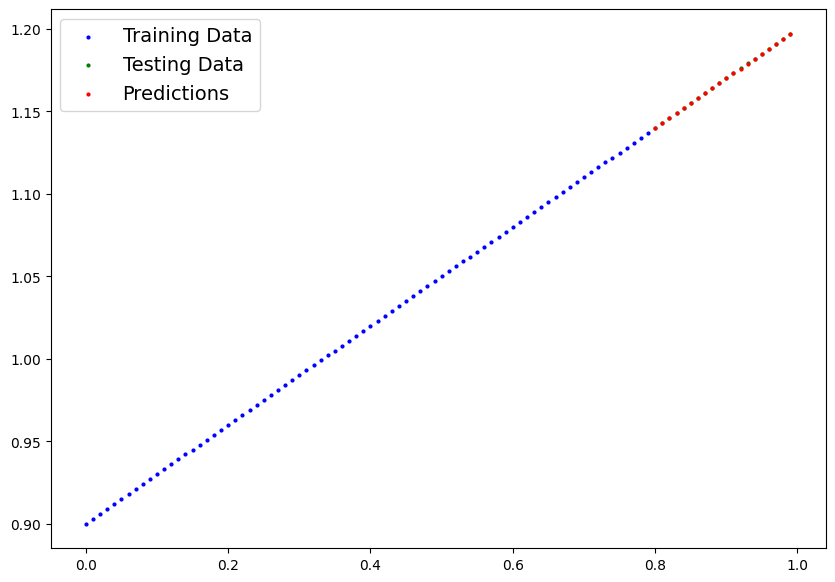

In [148]:
# Plot the predictions (these may need to be on a specific device)
plot_data(predictions=y_predictions.to(device))

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [149]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("created_models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_exerc_pytorch_workflow_model_1_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: created_models/01_exerc_pytorch_workflow_model_1_0.pth


In [150]:
from pickle import load
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_1_0 = LinearRegressionModel()
loaded_model_1_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1_0.to(device)
loaded_model_1_0.state_dict()
next(loaded_model_1_0.parameters()).device

device(type='cpu')

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Make predictions with loaded model and compare them to the previous
loaded_model_1_0.eval()
with torch.inference_mode():
  loaded_model_1_predictions = loaded_model_1_0(X_testing_data)
y_predictions == loaded_model_1_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])